## Major Project : Music Mood Prediction
#### Krishi Agrahari, Rajsi Kesharwani, Nikhil Kamale, Kirti Mohitkar, Shazia Khan



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
import json
warnings.filterwarnings("ignore")

## Part 2 : Data Pre-processing

### We need to preprocess lyrics to use it for NLP models. The main preprocessing steps are - Tokenize Words, Stemming, Stop-word removal, Lemmatization. 

In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [3]:
df=pd.read_csv("training_backup.csv")
df_new=pd.read_csv("testing_backup.csv")

### Tokenization of words in lyrics

In [4]:
df_new['lyrics'] = [entry.lower() for entry in df_new['lyrics']]
df_new['lyrics']= [word_tokenize(entry) for entry in df_new['lyrics']]

In [5]:
df['lyrics'] = [entry.lower() for entry in df['lyrics']]
df['lyrics']= [word_tokenize(entry) for entry in df['lyrics']]

### Stemming, Stopword Removal, Lemmatization

In [6]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_new['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df_new.loc[index,'text_final'] = str(Final_words)

In [7]:
df.tail()

,lyrics,mood
1477,"[yeah-yeah, yeah-yeah, yeah-yeah, yeah-yeah, y...",1
1478,"[rip, them, down, hold, me, up, tell, them, th...",3
1479,"[it, 's, way, too, late, to, think, of, someon...",4
1480,"[got, no, place, to, go, but, there, 's, a, gi...",2
1481,"[every, light, in, the, night, flicker, in, an...",1


In [8]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df.loc[index,'text_final'] = str(Final_words)

### Creating Training data, training label, test data, test label

In [9]:
train_x = df['text_final']
valid_x = df_new['text_final'][:233]
train_y = df['mood']
valid_y = df_new['mood'][:233]

## Part 3 : Feature Engineering

### We cannot give input as a list of words in Machine Learning models. Feature Engineering needs to be done for the lyrics column. We will use 3 types of NLP models for this -

#### CountVectorizer
#### TfidfVectorizer
#### Tfidf-NGram Model

### At first, Label Encoding -

In [10]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y.ravel())
valid_y = Encoder.fit_transform(valid_y.ravel())

In [11]:
all_texts = []
for items in train_x:
    all_texts.append(items) 
for items in valid_x:
    all_texts.append(items)
print(all_texts[0])

['god', 'need', 'friend', 'god', 'come', 'end', 'god', 'lose', 'mind', 'god', 'find', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'love', 'felt', 'like', 'hate', 'hate', 'felt', 'like', 'love', 'say', 'fear', 'say', 'scar', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'tell', 'believe', 'tell', 'see', 'cause', 'know', 'trust', 'heart', 'fill', 'disgust', 'ca', 'take', 'tell', 'believe', 'tell', 'see', 'cause', 'know', 'trust', 'heart', 'fill', 'disgust', 'tell', 'believe', 'tell', 'believe', 'lady', 'gentleman', 'may', 'attention', 'ready', 'joke', 'ready', 'great', 'deception', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe']


In [12]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas,numpy,xgboost, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

### CountVectorizer Model

In [13]:
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(all_texts)
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

### TfidfVectorizer Model

In [14]:
import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()
def porter_tokenizer(text, stemmer=porter_stemmer):
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words="english",
            tokenizer=porter_tokenizer
    )

### Tfidf-NGram Model

In [15]:
#tfidf_vect = TfidfVectorizer(analyzer='word',max_features=7000)
tfidf_vect.fit(all_texts)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,2), max_features=7000)
tfidf_vect_ngram.fit(all_texts)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

### Now 3 Training Dataset, 3 Test Dataset are ready to fit into Machine Learning models, one dataset per model defined above.

## Part 4 : Mood Prediction Model

In [16]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    classifier.fit(feature_vector_train, label)
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y)

### Multinomial Naive Bayes Model

In [17]:
accuracy_count_nb = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy_count_nb)

accuracy_word_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy_word_nb)

accuracy_ngram_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy_ngram_nb)

NB, Count Vectors:  0.5836909871244635
NB, WordLevel TF-IDF:  0.4592274678111588
NB, N-Gram Vectors:  0.5793991416309013


### Random Forest Classifier

In [18]:
accuracy_count_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_count,train_y,xvalid_count)
print("RF, Count Vectors: ",accuracy_count_rf)

accuracy_word_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf,train_y,xvalid_tfidf)
print("RF, WordLevel TF-IDF Vectors: ",accuracy_word_rf)

accuracy_ngram_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf_ngram,train_y,xvalid_tfidf_ngram)
print("RF, N-Gram Vectors: ",accuracy_ngram_rf)

RF, Count Vectors:  0.6566523605150214
RF, WordLevel TF-IDF Vectors:  0.6394849785407726
RF, N-Gram Vectors:  0.630901287553648


### Logistic Regression Model

In [19]:
accuracy_count_lc = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy_count_lc)

accuracy_word_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy_word_lc)

accuracy_ngram_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy_ngram_lc)

LR, Count Vectors:  0.6351931330472103
LR, WordLevel TF-IDF:  0.6266094420600858
LR, N-Gram Vectors:  0.5836909871244635


### XGBoost Classifier

In [20]:
accuracy_count_bo = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy_count_bo)

accuracy_word_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy_word_bo)

accuracy_ngram_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(), train_y, xvalid_tfidf_ngram.tocsc())
print ("Xgb, Ngram Level Vectors: ", accuracy_ngram_bo)

[11:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgb, Count Vectors:  0.6866952789699571
[11:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgb, WordLevel TF-IDF:  0.630901287553648
[11:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the

### Bagging - Random Forest

In [21]:
accuracy_count_bg = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy_count_bg)

accuracy_word_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy_word_bg)

accuracy_ngram_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("RF, Ngram Vectors: ", accuracy_ngram_bg)

RF, Count Vectors:  0.6609442060085837
RF, WordLevel TF-IDF:  0.6781115879828327
RF, Ngram Vectors:  0.6137339055793991


In [22]:
from sklearn.svm import LinearSVC
accuracy_count_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_count, train_y, xvalid_count)
print ("SVM, Count Vectors: ", accuracy_count_svm)

accuracy_word_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM, WordLevel TF-IDF: ", accuracy_word_svm)

accuracy_ngram_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, Ngram Vectors: ", accuracy_ngram_svm)

SVM, Count Vectors:  0.6223175965665236
SVM, WordLevel TF-IDF:  0.6523605150214592
SVM, Ngram Vectors:  0.6223175965665236


In [23]:

import matplotlib as mpl
import numpy as np

def plot_cm(X, y, clf, title):

    cm = metrics.confusion_matrix(y, clf.predict(X))
    print(metrics.classification_report(y, clf.predict(X)))
    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(10,10))

    hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad','angry','relaxed'],
            xticklabels=['happy','sad','angry','relaxed'],
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    #plt.savefig("rf_tfidf.jpg")
    plt.show()
    

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        97
           1       0.50      0.84      0.63        68
           2       1.00      0.33      0.50        12
           3       0.73      0.43      0.54        56

    accuracy                           0.64       233
   macro avg       0.75      0.57      0.60       233
weighted avg       0.70      0.64      0.64       233



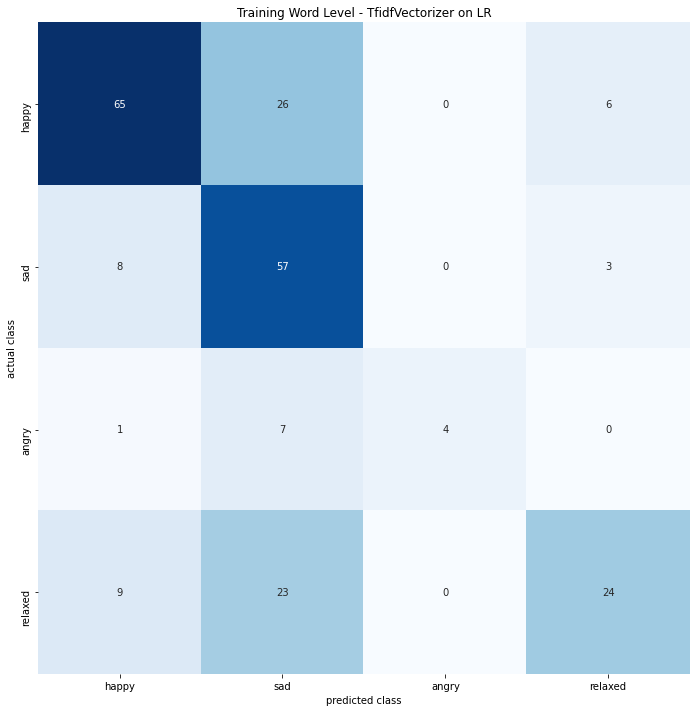

In [24]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=ensemble.RandomForestClassifier()
claf.fit(xtrain_tfidf,train_y)
plot_cm(xvalid_tfidf, valid_y, claf, 'Training Word Level - TfidfVectorizer on LR')

              precision    recall  f1-score   support

           0       0.78      0.66      0.72        97
           1       0.58      0.66      0.62        68
           2       0.44      0.33      0.38        12
           3       0.54      0.62      0.58        56

    accuracy                           0.64       233
   macro avg       0.59      0.57      0.57       233
weighted avg       0.65      0.64      0.64       233



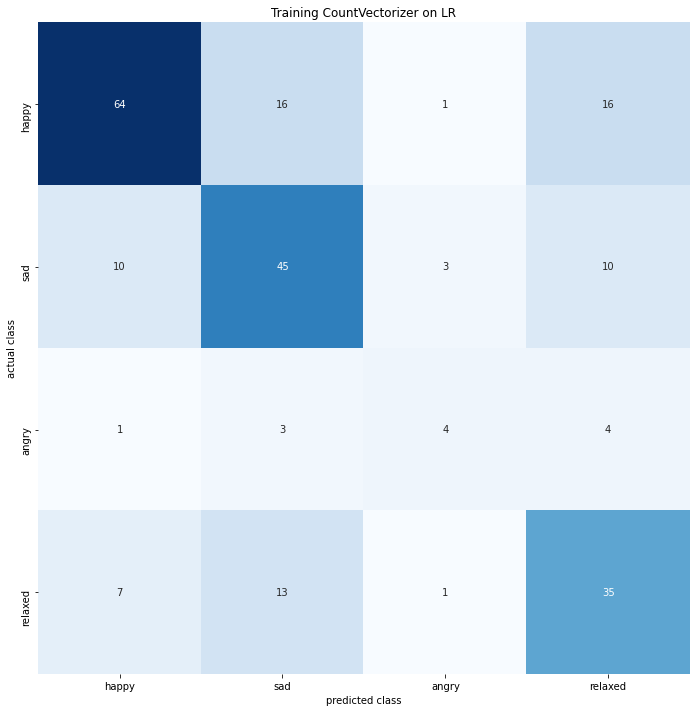

In [25]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=linear_model.LogisticRegression()
claf.fit(xtrain_count,train_y)
plot_cm(xvalid_count, valid_y, claf, 'Training CountVectorizer on LR')

              precision    recall  f1-score   support

           0       0.84      0.51      0.63        97
           1       0.52      0.78      0.63        68
           2       0.80      0.33      0.47        12
           3       0.52      0.64      0.58        56

    accuracy                           0.61       233
   macro avg       0.67      0.57      0.58       233
weighted avg       0.67      0.61      0.61       233



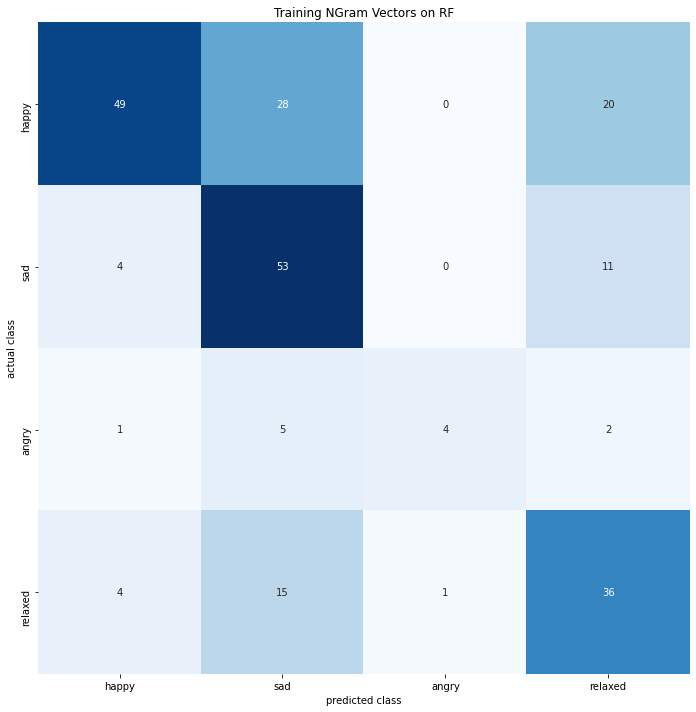

In [26]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=ensemble.RandomForestClassifier()
claf.fit(xtrain_tfidf_ngram,train_y)
plot_cm(xvalid_tfidf_ngram, valid_y, claf, 'Training NGram Vectors on RF')

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        97
           1       0.64      0.69      0.67        68
           2       0.80      0.33      0.47        12
           3       0.51      0.61      0.55        56

    accuracy                           0.65       233
   macro avg       0.68      0.58      0.60       233
weighted avg       0.67      0.65      0.65       233



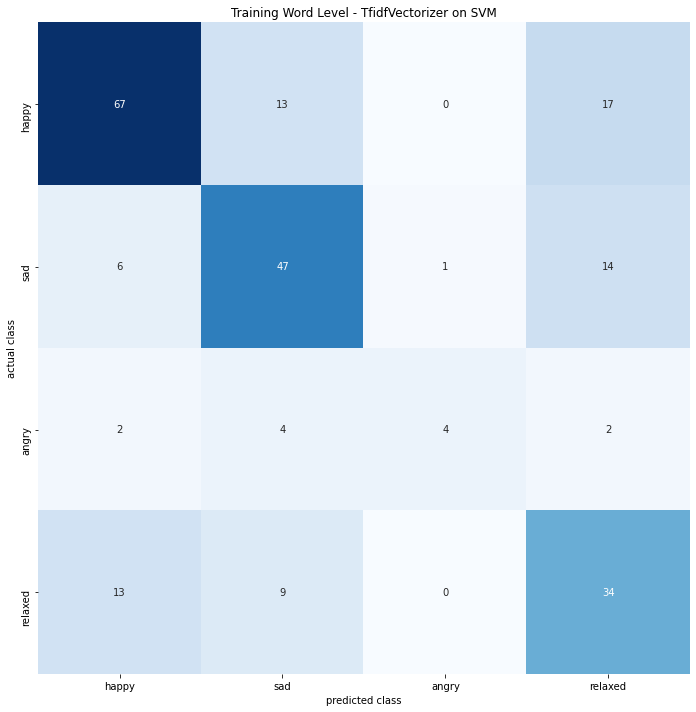

In [27]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=svm.LinearSVC(multi_class="ovr")
claf.fit(xtrain_tfidf,train_y)
plot_cm(xvalid_tfidf, valid_y, claf, 'Training Word Level - TfidfVectorizer on SVM')

In [28]:
def pred(lyrics):
    wt=word_tokenize(lyrics)
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(wt):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    result = str(Final_words)
    df9=pd.DataFrame(columns=["lyrics"])
    df9=df9.append({'lyrics':result},ignore_index=True)
#     xvalid_count =  count_vect.transform(result)
#     res = Encoder.fit_transform(result)
    testx=df9['lyrics']
#     print(testx.shape)
    xvalid_tfidf =  tfidf_vect.transform(testx)
    y=claf.predict(xvalid_tfidf)
    print("Tag: ",end='')
    if y==0:
        print("Happy")
    elif(y==1):
        print("Sad")
    elif(y==2):
        print("Angry")
    elif(y==3):
        print("Relaxed")
    
    

In [29]:
from googletrans import Translator
def pred1(lyrics):
    translator = Translator()
    l1=translator.translate(lyrics)
    #print(l1)
    lyrics=l1.text
    wt=word_tokenize(lyrics)
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(wt):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    result = str(Final_words)
    df9=pd.DataFrame(columns=["lyrics"])
    df9=df9.append({'lyrics':result},ignore_index=True)
#     xvalid_count =  count_vect.transform(result)
#     res = Encoder.fit_transform(result)
    testx=df9['lyrics']
#     print(testx.shape)
    xvalid_tfidf =  tfidf_vect.transform(testx)
    y=claf.predict(xvalid_tfidf)
    print("Tag: ",end='')
    if y==0:
        print("Happy")
    elif(y==1):
        print("Sad")
    elif(y==2):
        print("Angry")
    elif(y==3):
        print("Relaxed")

#### Ilahi song by Arijit Singh

In [37]:
pred1("Shaamein malang see\nRaatein surang see\nBaaghi udaan pe hi naa jaane kyun\nIlahi mera jee aaye aaye\nIlaahi mera jee aaye aaye\n DaDa dang dang dung dung dang...\nKal pe sawaal hai\njeena filhaal hai\nKhaanaabadoshiyon pe hi jaane kyoon\nIlahi meraa jee aaye aaye\nIlaahi mera jee aaye aaye\nMeraa falsafaa kandhe pe mera bastaa\nChalaa main jahaan le chalaa mujhe rastaa\nBoondon pe nahin\nBoondon ke samandar pe wo-o-wo-o...\nIlahi mera jee aaye aaye\nIlahi mera jee aaye aaye..\nShaamein malang si\nRaatein surang si\nBaaghi udaan pe hi na jaane kyun\nIlahi mera jee aaye aaye\nIlahi mera jee aaye aaye\nIlahii.. Ilahi.. Ilahi...")

Tag: Happy


In [38]:
pred("Evenings, as if they're mad,\nnights like some tunnel..\nI don't know why on rebel flights only,\nO God, my heart comes..\nO God, my heart is interested..\nThere is a question about tomorrow,\n[as in, no one knows what happens tomorrow]\nLiving life is now.\nI don't know why in nomadic ways only\nI find my heart interested, O Lord,\nmy heart is interested..\nMy philosophy is - my bag is on my shoulders.\nI go wherever the path takes me..\nNot on the drops,\nBut the sea of drops itself..\nO God, O God.. O God..")

Tag: Happy


#### Tera Hone Laga Hoon song by Atif Aslam

In [39]:
pred("I’m becoming yours,\nGetting lost in my thoughts,\nSince I met you...\nShould I touch you with my sight,\nBecause my arms yearn for you,\nMy hear has called out,\nSo come on now...\nLook, the dewdrops fall as rain,\nEven the weather drops a hint,\nSo come on now...\nFemale:\nArm in arm,\nlike an embrace,\nI admit, and I agree,\nI’m in love with you. Atif:\nI’m becoming yours,\nGetting lost in my thoughts,\nSince I met you...")

Tag: Happy


In [40]:
pred1("Bahon mein dale bahein bahein\nBahon ka jaise haar hua\nHaan maana main ne maana maana\nHua mujhe bhi pyaar hua \nTera hone laga hoon\nKhone Laga hoon\nJab se mila hoon\nTera hone laga hoon\nKhone Laga hoon\nJab se mila hoon")

Tag: Happy


In [41]:
pred("All the faces are stony, even the hearts are made of stone\nThen why do I remain lonely, and roam the streets like a destitute \nYou shall not attain anything here, my heart\nIf a dream breaksin a single moment\nThe world seems lonely\nThe world seems lonely\nWhen no loved one remains\nThe world seems lonely\nThe world seems lonely \nWhy does this happen\nWhen this heart cries out\nEven the wind seems as if it is crying? \nThe world seems lonely\nIf a dream breaks in a single moment\nThe world seems lonely\nThe world seems lonely\nWhen no loved one remains\nThe world seems lonely\nThe world seems lonely\nSeems lonely")

Tag: Sad


In [42]:
pred1("maine roya tujhe dhund Sisak Sisak Ke Hawaayein \nJag Soona Laage \nChhan Se Jo Toote Koi ")

Tag: Happy


#### Maine Roya song by Tanveer Evan

In [43]:
pred("I cried: I cried you in the mist of mist, I didn't get you to sleep in these nights. I've never thought of rotha in your memories. I never thought you just cried.")

Tag: Sad


In [44]:
pred1("Maine roya tujhe dhund dhunde Royatha main Tu na milaa Gehrisi in raaton mein soyaa naa tha main Rotatha teri yaadon mein woh hi raat")

Tag: Sad


In [45]:
pred1("Jo dil mein bhara tune Dekhegi uss zeher ko \nBhugtegi mere gham ko \nMeri aah ke kahar ko\nApni khudgarzi ka ab anzaam dekhegi")

Tag: Sad
